In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit as cf
from scipy.stats import chi2
from math import floor

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 20
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
def chi2_red(y,y_err,x,func,popt):
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    y_ajuste = func(x,*popt)
    
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def r2(y,x,lineal,pars):
    r2 = 1 - (np.sum((y-lineal(x,*pars))**2)/np.sum((y - np.mean(y))**2))
    return r2

dcmls = lambda x : -int(floor(np.log10(abs(x))))
lineal = lambda x,a : a*x
senc2 = lambda x,a,b : (np.sin(a*x+b)/(a*x+b))**2

La longitud de onda es (654.1660156 ± 6.541660156000001) nm


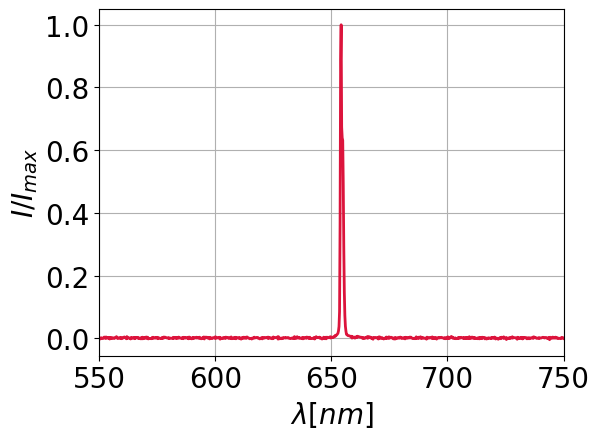

In [4]:
data0 = np.loadtxt('espectro.csv',delimiter=';',unpack=True,skiprows=48)
lambda0,density0 = data0
i0 = density0/max(density0)

lambda_laser = lambda0[i0.tolist().index(1)]
err_lambda_laser= lambda_laser/100

print(f'La longitud de onda es ({lambda_laser} ± {err_lambda_laser}) nm')

plt.plot(lambda0,i0,'crimson')
plt.grid()
plt.xlabel(r'$\lambda [nm]$')
plt.ylabel(r'$I/I_{max}$')
plt.xlim(550,750)
plt.savefig('espectro.png')

6.541660156000001 6.341118554234774e-12
El ancho de la rendija es de (0.24740645427437413 ± 0.0024740645427438128) mm
27.42925977531555
0.9995086178226165


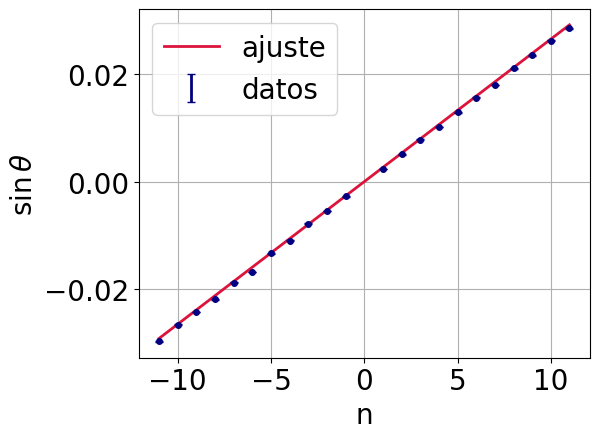

In [8]:
data1 = np.loadtxt('barrido_min.csv',delimiter=',',unpack=True,skiprows=1)
n1,y1,err_y1 = data1
D1 = 128.2 # cm
err_D1 = 0.1 # cm
sin1 = y1/D1
err_sin1 = np.sqrt((err_y1/D1)**2+(err_D1*y1/D1**2)**2)

pars1,cov1 = cf(lineal,n1,sin1,sigma=err_sin1,absolute_sigma=True)
m1 = pars1[0]
err_m1 = cov1[0][0]
x1_adj = np.linspace(min(n1),max(n1),100)
y1_adj = lineal(x1_adj,m1)

a1 = lambda_laser/m1/10**6
err_a1 = np.sqrt((err_lambda_laser/m1)**2+(err_m1*lambda_laser/m1**2)**2)/10**6

print(f'El ancho de la rendija es de ({a1} ± {err_a1}) mm')
print(chi2_red(sin1,err_sin1,n1,lineal,pars1))
print(r2(sin1,n1,lineal,pars1))

plt.plot(x1_adj,y1_adj,'crimson',label='ajuste',zorder=1)
plt.errorbar(n1,sin1,yerr=err_sin1,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(n1,sin1,c='navy',zorder=3)
plt.xlabel('n')
plt.ylabel(r'$\sin{\theta}$')
plt.grid()
plt.legend()
plt.savefig('sin_n.png')

19.887972721331515


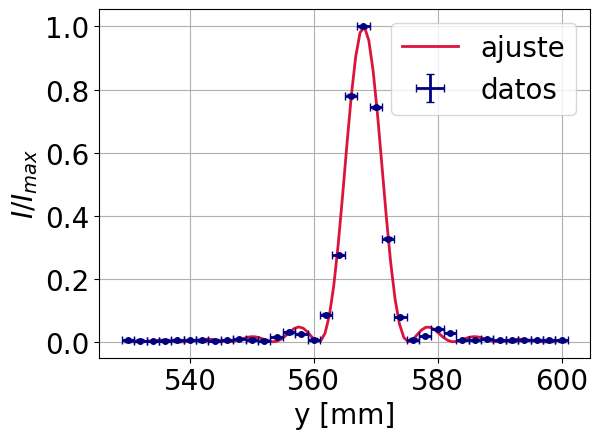

In [7]:
data2 = np.loadtxt('con mascara.csv',delimiter=',',unpack=True,skiprows=2)
y2,err_y2,i2,std2 = data2
ruido = 0.38
err_i2 = np.zeros_like(i2)
for i in range(len(i2)):
    err_i2[i] += max(ruido,std2[i])
I0_2 = max(i2)
err_I0_2 = err_i2[i2.tolist().index(I0_2)]
dI2 = i2/I0_2
err_dI2 = np.sqrt((err_i2/I0_2)**2+(err_I0_2*i2/I0_2**2)**2)

pars2,cov2 = cf(senc2,y2,dI2,sigma=err_dI2,absolute_sigma=True,p0=[np.pi/10,-570*np.pi/10])
w2,phi02 = pars2
err_w2 = cov2[0,0]
err_phi02 = cov2[1,1]
x2_adj = np.linspace(min(y2),max(y2),100)
y2_adj = senc2(x2_adj,w2,phi02)

print(chi2_red(dI2,err_dI2,y2,senc2,pars2))

plt.plot(x2_adj,y2_adj,'crimson',label='ajuste',zorder=1)
plt.errorbar(y2,dI2,yerr=err_dI2,xerr=err_y2,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(y2,dI2,c='navy',zorder=3)
plt.grid()
plt.xlabel('y [mm]')
plt.ylabel(r'$I/I_{max}$')
plt.legend()
plt.savefig('c_mascara.png')

In [ ]:
data3 = np.loadtxt('sin mascara.csv',delimiter=',',unpack=True,skiprows=2)
y3,err_y3,i3,std3 = data3
ruido = 0.38
err_i3 = np.zeros_like(i3)
for i in range(len(i3)):
    err_i3[i] += max(ruido,std3[i])
I0_3 = max(i3)
err_I0_3 = err_i3[i3.tolist().index(I0_3)]
dI3 = i3/I0_3
err_dI3 = np.sqrt((err_i3/I0_3)**2+(err_I0_3*i3/I0_3**2)**2)

pars3,cov3 = cf(senc2,y3,dI3,sigma=err_dI3,absolute_sigma=True,p0=[np.pi/10,-570*np.pi/10])
w3,phi03 = pars3
err_w3 = cov3[0,0]
err_phi03 = cov3[1,1]
x3_adj = np.linspace(min(y3),max(y3),100)
y3_adj = senc2(x3_adj,w3,phi03)

print(chi2_red(dI3,err_dI3,y3,senc2,pars3))

plt.plot(x3_adj,y3_adj,'crimson',label='ajuste',zorder=1)
plt.errorbar(y3,dI3,yerr=err_dI3,xerr=err_y3,fmt='None',ecolor='navy',label='datos',zorder=2)
plt.scatter(y3,dI3,c='navy',zorder=3)
plt.grid()
plt.xlabel('y [mm]')
plt.ylabel(r'$I/I_{max}$')
plt.legend()
plt.savefig('s_mascara.png')